# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [2]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [5]:
# 生成 5 群資料
x, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

 silhouette score for 2 clusters : 0.5027144446956527
 sample size : 500
 silhouette score for 3 clusters : 0.6105565451092732
 sample size : 500
 silhouette score for 4 clusters : 0.6270122040179333
 sample size : 500
 silhouette score for 5 clusters : 0.6115749260799671
 sample size : 500
 silhouette score for 6 clusters : 0.5510541838971206
 sample size : 500
 silhouette score for 7 clusters : 0.5027696423963783
 sample size : 500
 silhouette score for 8 clusters : 0.4184600226990741
 sample size : 500


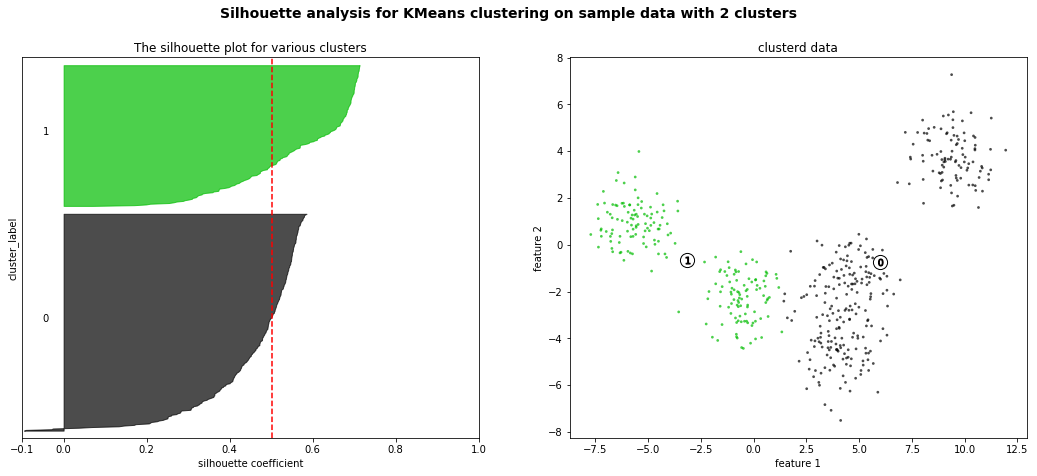

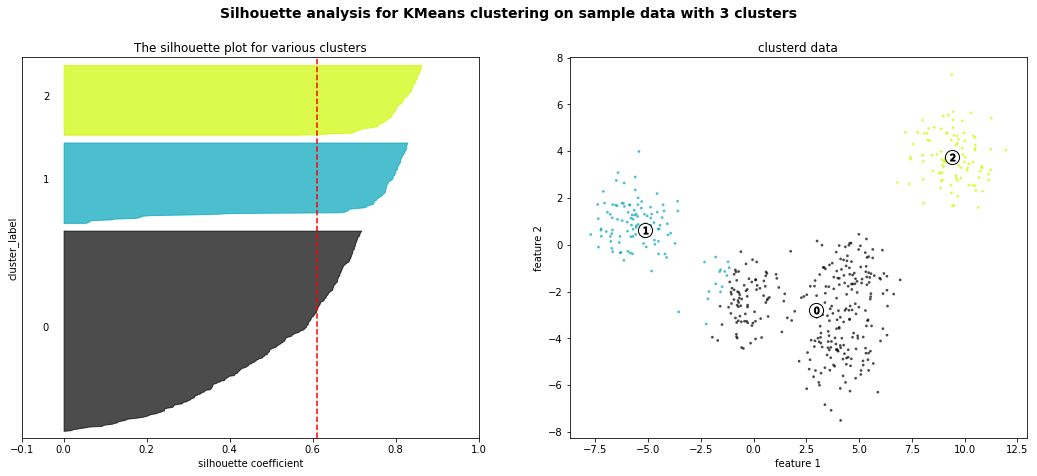

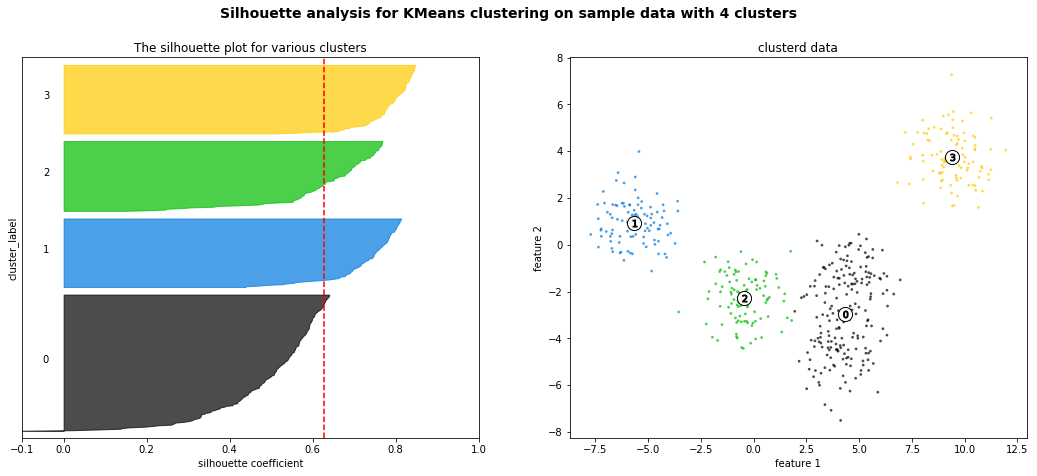

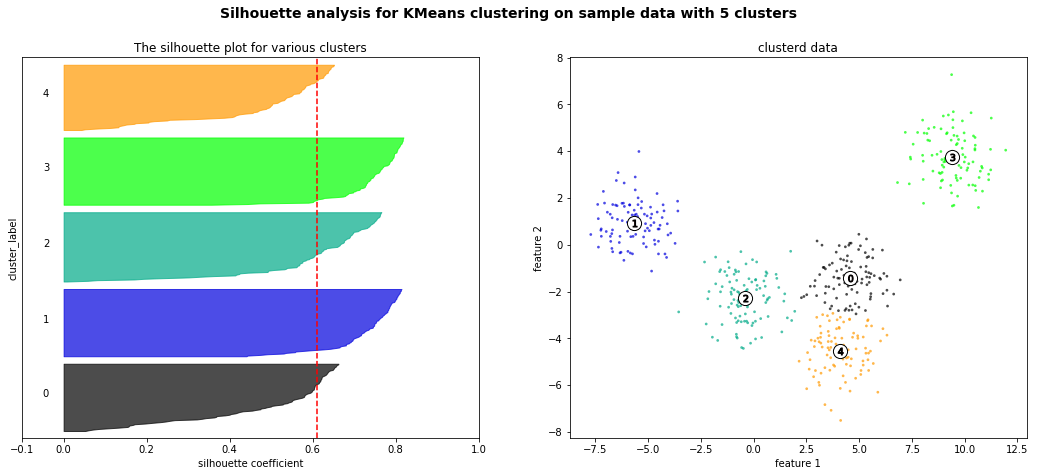

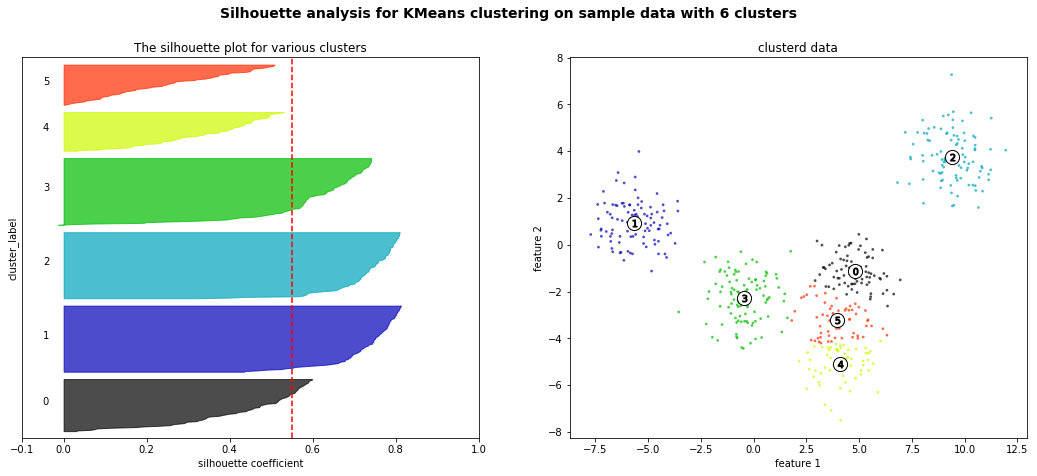

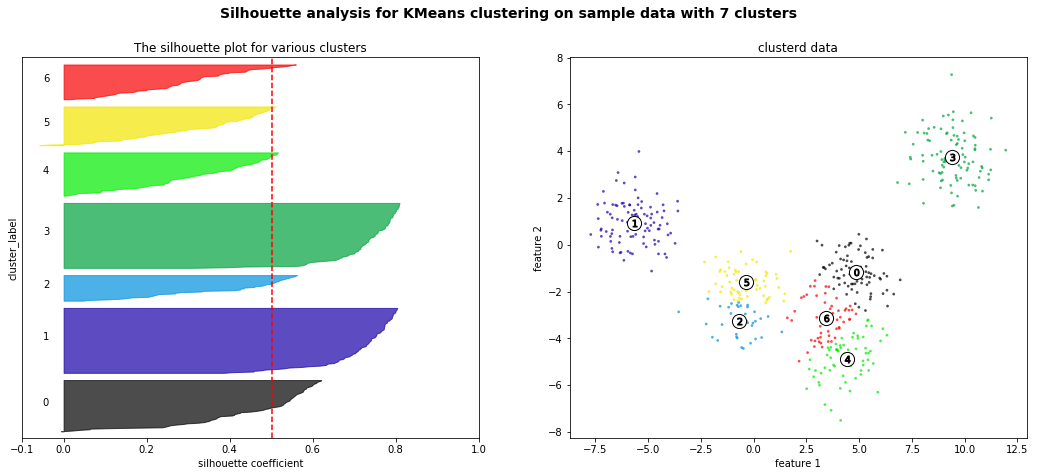

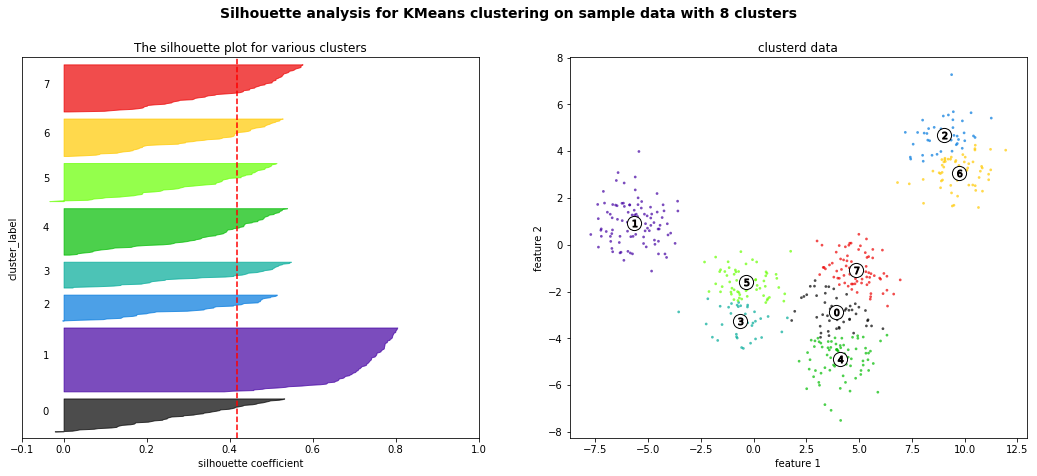

In [7]:
# 計算並繪製輪廓分析的結果
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(x) + (n_clusters+1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters, random_state = 17)
    labels = estimator.fit_predict(x)
    
    ss_avg = silhouette_score(x, labels)
    
    print(f' silhouette score for {n_clusters} clusters : {ss_avg}')
    sample_s_vals = silhouette_samples(x, labels)
    
    print(f' sample size : {len(sample_s_vals)}')
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_s_vals = sample_s_vals[i == labels]
        ith_cluster_s_vals.sort()
        
        ith_cluster_size = len(ith_cluster_s_vals)
        y_upper = y_lower + ith_cluster_size
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx( np.arange(y_lower, y_upper), 0, ith_cluster_s_vals, facecolor = color, edgecolor = color, alpha = 0.7)
        ax1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel('silhouette coefficient')
    ax1.set_ylabel('cluster_label')
        
    ax1.axvline( x = ss_avg, color = 'red', linestyle = '--')
        
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        
    colors = cm.nipy_spectral(labels.astype(float)/n_clusters)
    ax2.scatter(x[:,0], x[:,1], marker = '.', s = 30 , lw=0, alpha = 0.7, c = colors, edgecolor = 'k' )
    centers = estimator.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1], marker = 'o', c = "white", alpha = 1, s=200, edgecolor = 'k')
    
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1], marker = '$%d$' %i , alpha = 1 , color = 'red', s = 50, edgecolor = 'k')
    
    ax2.set_title('clusterd data')
    ax2.set_xlabel('feature 1')
    ax2.set_ylabel('feature 2')
    
    plt.suptitle(f'Silhouette analysis for KMeans clustering on sample data with {n_clusters} clusters', fontsize = 14, fontweight = 'bold')
plt.show()